This analysis follows that from Christensen et al., (2015) where a covariance diagnostic is used to determine the regimes.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
sns.set_style('darkgrid')
import seaborn as sns
import time
from pickle import load

import math
import os
from matplotlib.ticker import MultipleLocator

In [2]:
k = 8
J = 32

In [3]:
def sum_consecutive(s):
    p = s[:1]   # final list
    cur = s[0]  # keep track of last seen value

    for i in s[1:]:  # your exercise: replace this with `range` 
        if i == cur:
            p[-1] += i
        else:
            p.append(i)
            cur = i

    return p

# F 21.5 #


In [4]:

truth_set_full = np.load("../../data/truth_run/climate_change_exp/full_val_21_5_set.npy")[:,:,0]

train_dataset_x = truth_set_full[:1000000,:]

total_energy_train = np.sum(train_dataset_x**2,axis=1)*0.5

time = np.arange(0,train_dataset_x.shape[0],1)

In [5]:
train_dataset_x.max()

18.916462583249167

(array([2.20000e+01, 5.82000e+02, 4.12200e+03, 1.33800e+04, 2.71790e+04,
        5.05040e+04, 8.04390e+04, 1.09732e+05, 1.36232e+05, 1.59791e+05,
        1.83750e+05, 2.08131e+05, 2.50767e+05, 2.90545e+05, 3.28365e+05,
        3.62266e+05, 3.89670e+05, 4.12743e+05, 4.37458e+05, 4.52091e+05,
        4.50022e+05, 4.18481e+05, 3.84830e+05, 3.56247e+05, 3.32749e+05,
        3.01222e+05, 2.76683e+05, 2.63223e+05, 2.48803e+05, 2.26692e+05,
        2.05853e+05, 1.83216e+05, 1.57001e+05, 1.30595e+05, 9.03580e+04,
        4.81940e+04, 1.97120e+04, 6.96100e+03, 1.25100e+03, 1.38000e+02]),
 array([-12.0304524 , -11.25677952, -10.48310665,  -9.70943378,
         -8.9357609 ,  -8.16208803,  -7.38841515,  -6.61474228,
         -5.8410694 ,  -5.06739653,  -4.29372365,  -3.52005078,
         -2.7463779 ,  -1.97270503,  -1.19903216,  -0.42535928,
          0.34831359,   1.12198647,   1.89565934,   2.66933222,
          3.44300509,   4.21667797,   4.99035084,   5.76402372,
          6.53769659,   7.3113

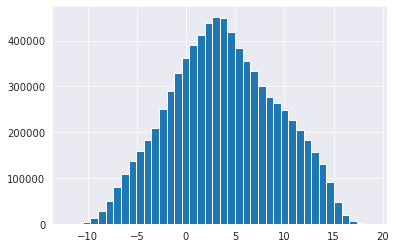

In [71]:
plt.hist(np.ravel(train_dataset_x),bins=40)

In [64]:
#here a rolling window for cov_diagnostic is used
cov_diagnostic_2 = np.zeros(train_dataset_x.shape[0],)
step_for_diagnostic = 200
for i in range(int(200/2)):
    array = train_dataset_x[:200,:]
    cov = np.cov(array,rowvar=False)
    cov_values = cov[0,4] + cov[1,5] + cov[2,6] + cov[3,7]
    cov_diagnostic_2[i,] = cov_values/4
print(i)
for j in np.arange(100,train_dataset_x.shape[0]-200):
    array = train_dataset_x[j-100:j+100,:]
    cov = np.cov(array,rowvar=False)
    cov_values = cov[0,4] + cov[1,5] + cov[2,6] + cov[3,7]
    cov_diagnostic_2[j,] = cov_values/4
print(j)
for m in np.arange(j+1,train_dataset_x.shape[0]):
    array = train_dataset_x[j+1:,:]
    cov = np.cov(array,rowvar=False)
    cov_values = cov[0,4] + cov[1,5] + cov[2,6] + cov[3,7]
    cov_diagnostic_2[m,] = cov_values/4
print(m)

99
999799
999999


In [65]:
regime_2 = np.zeros(train_dataset_x.shape[0],)
for i in range(train_dataset_x.shape[0]):
    if cov_diagnostic_2[i,] > 0:
        regime_2[i,] = 1
    else: regime_2[i,] = 0

In [67]:
#work out time spend in regime a 
regime_a = sum_consecutive(regime_2.tolist())

regime_a = [i for i in regime_a if i != 0.0]


#now convert time into mtu
regime_a = np.asarray(regime_a)*0.005

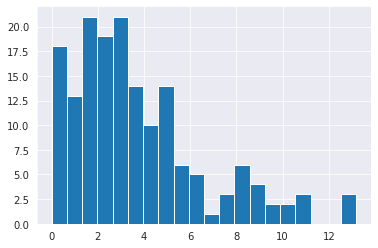

In [77]:
#fig 14 a 
plt.hist(regime_a,bins=20)
plt.show()

In [78]:
np.mean(regime_a)

3.72530303030303

In [68]:
#work out time spend in regime a 
regime_b = sum_consecutive((regime_2-1).tolist())

regime_b = [i for i in regime_b if i != 0.0]


#now convert time into mtu
regime_b = np.asarray(regime_b)*0.005*-1

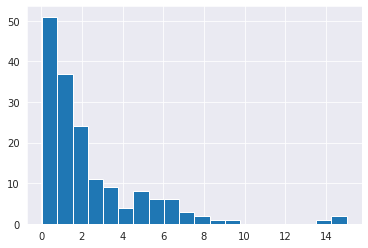

In [80]:
#fig 14 b
plt.hist(regime_b,bins=20)
plt.show()

In [40]:
np.mean(regime_b)

2.321234939759036

Proportion of time spent in rarer regime.

In [69]:
1 - np.average(regime_2)

0.378614

# F = 28 

In [75]:
truth_set_full = np.load("../../data/truth_run/climate_change_exp/full_28_set.npy")[:,:,0]

In [59]:
train_dataset_x = truth_set_full[:1000000,:]

total_energy_train = np.sum(train_dataset_x**2,axis=1)*0.5

time = np.arange(0,train_dataset_x.shape[0],1)

#here a rolling window for cov_diagnostic is used
cov_diagnostic_2 = np.zeros(train_dataset_x.shape[0],)
step_for_diagnostic = 200
for i in range(int(200/2)):
    array = train_dataset_x[:200,:]
    cov = np.cov(array,rowvar=False)
    cov_values = cov[0,4] + cov[1,5] + cov[2,6] + cov[3,7]
    cov_diagnostic_2[i,] = cov_values/4
print(i)
for j in np.arange(100,train_dataset_x.shape[0]-200):
    array = train_dataset_x[j-100:j+100,:]
    cov = np.cov(array,rowvar=False)
    cov_values = cov[0,4] + cov[1,5] + cov[2,6] + cov[3,7]
    cov_diagnostic_2[j,] = cov_values/4
print(j)
for m in np.arange(j+1,train_dataset_x.shape[0]):
    array = train_dataset_x[j+1:,:]
    cov = np.cov(array,rowvar=False)
    cov_values = cov[0,4] + cov[1,5] + cov[2,6] + cov[3,7]
    cov_diagnostic_2[m,] = cov_values/4
print(m)

99
999799
999999


Proportion of time spent in rarer regime.

In [60]:
regime_2 = np.zeros(train_dataset_x.shape[0],)
for i in range(train_dataset_x.shape[0]):
    if cov_diagnostic_2[i,] > 0:
        regime_2[i,] = 1
    else: regime_2[i,] = 0

1 - np.average(regime_2)

0.500576